In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
result_paper = pd.read_csv('../final_result/result_paper.csv')
result_j = pd.read_csv('../final_result/result_j.csv')
result_rs = pd.read_csv('../final_result/result_rs.csv')

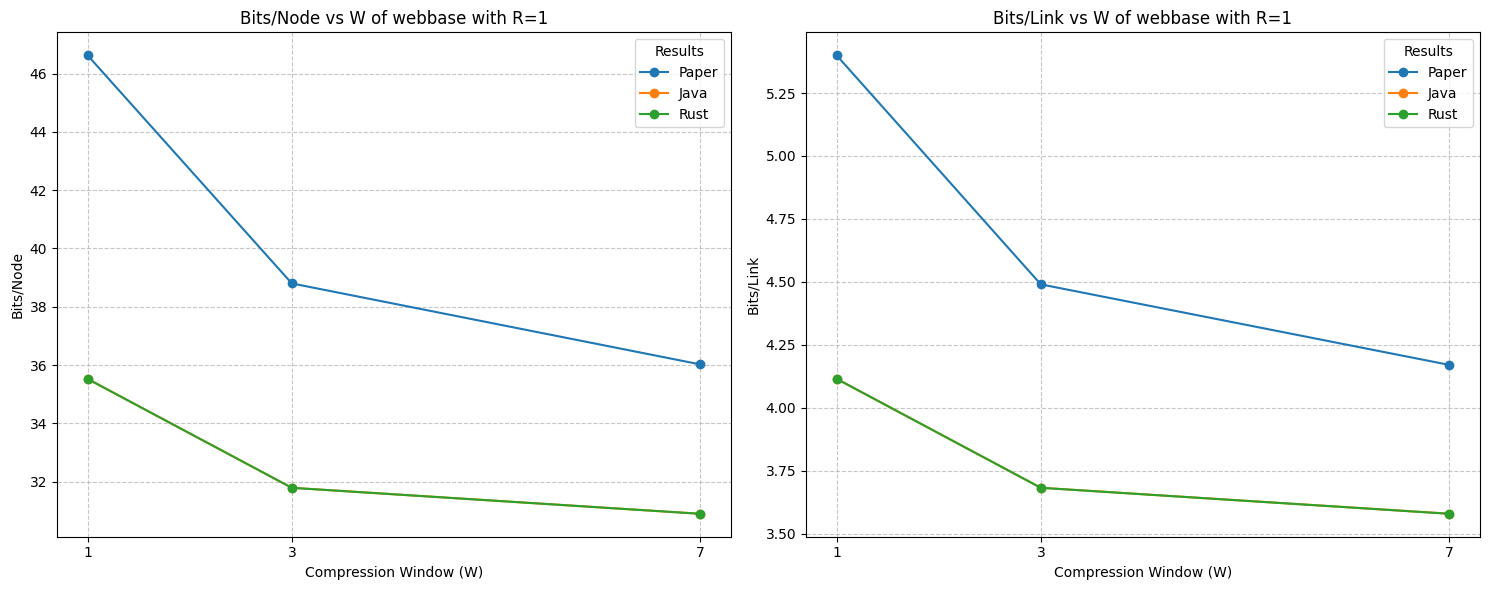

In [ ]:
# Values of W to consider
W_values = [1, 3, 7]

# Function for Bits/Node plot
def plot_w_bits_per_node(ax, *datasets, labels, title):
    for data, label in zip(datasets, labels):
        # Filter data for 'webbase' and MaxRefCount = 1
        filtered_data = data[
            (data['GraphName'] == 'webbase-2001') &
            (data['MaxRefCount'] == 1) &
            (data['CompressionWindow'].isin(W_values))
        ]
        
        # Sort data by W
        filtered_data = filtered_data.sort_values('CompressionWindow')
        
        # Plot the line
        ax.plot(filtered_data['CompressionWindow'], filtered_data['BitsNode'], 
                marker='o', label=label)
    
    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel('Compression Window (W)')
    ax.set_ylabel('Bits/Node')
    ax.set_xticks(W_values)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Results')

# Function for Bits/Link plot
def plot_w_bits_per_link(ax, *datasets, labels, title):
    for data, label in zip(datasets, labels):
        # Filter data for 'webbase' and MaxRefCount = 1
        filtered_data = data[
            (data['GraphName'] == 'webbase-2001') &
            (data['MaxRefCount'] == 1) &
            (data['CompressionWindow'].isin(W_values))
        ]
        
        # Sort data by W
        filtered_data = filtered_data.sort_values('CompressionWindow')
        
        # Plot the line
        ax.plot(filtered_data['CompressionWindow'], filtered_data['BitsLink'], 
                marker='o', label=label)
    
    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel('Compression Window (W)')
    ax.set_ylabel('Bits/Link')
    ax.set_xticks(W_values)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Results')

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# First plot (Bits/Node)
plot_w_bits_per_node(ax1, result_paper, result_j, result_rs, 
                     labels=['Paper', 'Java', 'Rust'], 
                     title='Bits/Node vs W of webbase with R=1')

# Second plot (Bits/Link)
plot_w_bits_per_link(ax2, result_paper, result_j, result_rs, 
                     labels=['Paper', 'Java', 'Rust'], 
                     title='Bits/Link vs W of webbase with R=1')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the plot as PNG
# plt.savefig('plot_webbase_W.png', format='png')

# Show the plots
plt.show()

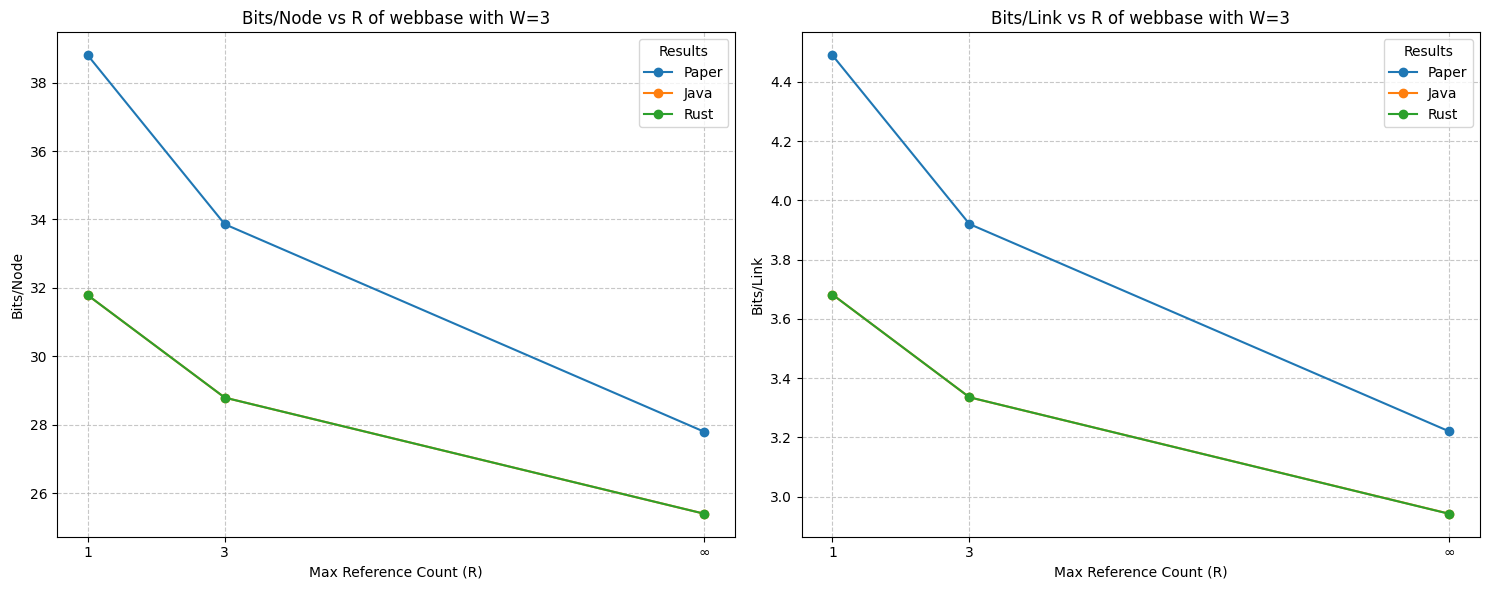

In [ ]:
# Values of R to consider
R_values = [1, 3, 10]

# Replace -1 with 10 for R
result_paper.loc[result_paper['MaxRefCount'] == -1, 'MaxRefCount'] = 10
result_j.loc[result_j['MaxRefCount'] == -1, 'MaxRefCount'] = 10
result_rs.loc[result_rs['MaxRefCount'] == -1, 'MaxRefCount'] = 10

# Function for Bits/Node plot
def plot_r_bits_per_node(ax, *datasets, labels, title):
    for data, label in zip(datasets, labels):
        # Filter data for 'webbase' and MaxRefCount in R_values
        filtered_data = data[
            (data['GraphName'] == 'webbase-2001') &
            (data['CompressionWindow'] == 3) &
            (data['MaxRefCount'].isin(R_values))
        ]
        
        # Sort data by MaxRefCount
        filtered_data = filtered_data.sort_values('MaxRefCount')
        
        # Plot the line
        ax.plot(filtered_data['MaxRefCount'], filtered_data['BitsNode'], 
                marker='o', label=label)
    
    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel('Max Reference Count (R)')
    ax.set_ylabel('Bits/Node')
    ax.set_xticks([1, 3, 10])
    ax.set_xticklabels(['1', '3', '∞'])
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Results')

# Function for Bits/Link plot
def plot_r_bits_per_link(ax, *datasets, labels, title):
    for data, label in zip(datasets, labels):
        # Filter data for 'webbase' and MaxRefCount in R_values
        filtered_data = data[
            (data['GraphName'] == 'webbase-2001') &
            (data['CompressionWindow'] == 3) &
            (data['MaxRefCount'].isin(R_values))
        ]
        
        # Sort data by MaxRefCount
        filtered_data = filtered_data.sort_values('MaxRefCount')
        
        # Plot the line
        ax.plot(filtered_data['MaxRefCount'], filtered_data['BitsLink'], 
                marker='o', label=label)
    
    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel('Max Reference Count (R)')
    ax.set_ylabel('Bits/Link')
    ax.set_xticks([1, 3, 10])
    ax.set_xticklabels(['1', '3', '∞'])
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Results')

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# First plot (Bits/Node)
plot_r_bits_per_node(ax1, result_paper, result_j, result_rs, 
                     labels=['Paper', 'Java', 'Rust'], 
                     title='Bits/Node vs R of webbase with W=3')

# Second plot (Bits/Link)
plot_r_bits_per_link(ax2, result_paper, result_j, result_rs, 
                     labels=['Paper', 'Java', 'Rust'], 
                     title='Bits/Link vs R of webbase with W=3')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the plot as PNG
# plt.savefig('plot_webbase_R.png', format='png')

# Show the plots
plt.show()